<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>

<font color="#138D75">**OSI SAF Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF wind: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **COMPLETE WITH ANY PRE-REQUISITES (e.g. account access), IF ANY**

There are no prerequisite notebooks for this module.
- **COMPLETE WITH ANY PRE-REQUISITE NOTEBOOKS, IF ANY**
    
</div>
<hr>

# 1.1 Map Metop ASCAT Wind

### Data used

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
|  |  |  |  | 

### Learning outcomes

At the end of this notebook you will know;
* How to open Metop Wind netcdf files
* Map ASCAT winds using cartopy

### Outline

...


<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

 1. [Setting parameters](#section1)
 1. [Mapping wind data](#section2)

<hr>

In [1]:
# library imports (adapt as required)
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ssl
import os
import warnings

ssl._create_default_https_context = ssl._create_unverified_context
warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting Parameters
[Back to top](#TOC_TOP)

</div>

In [2]:
# example code
directory = 'ascat_b'
cmap = mpl_cm.get_cmap('jet')

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping wind data
[Back to top](#TOC_TOP)

</div>

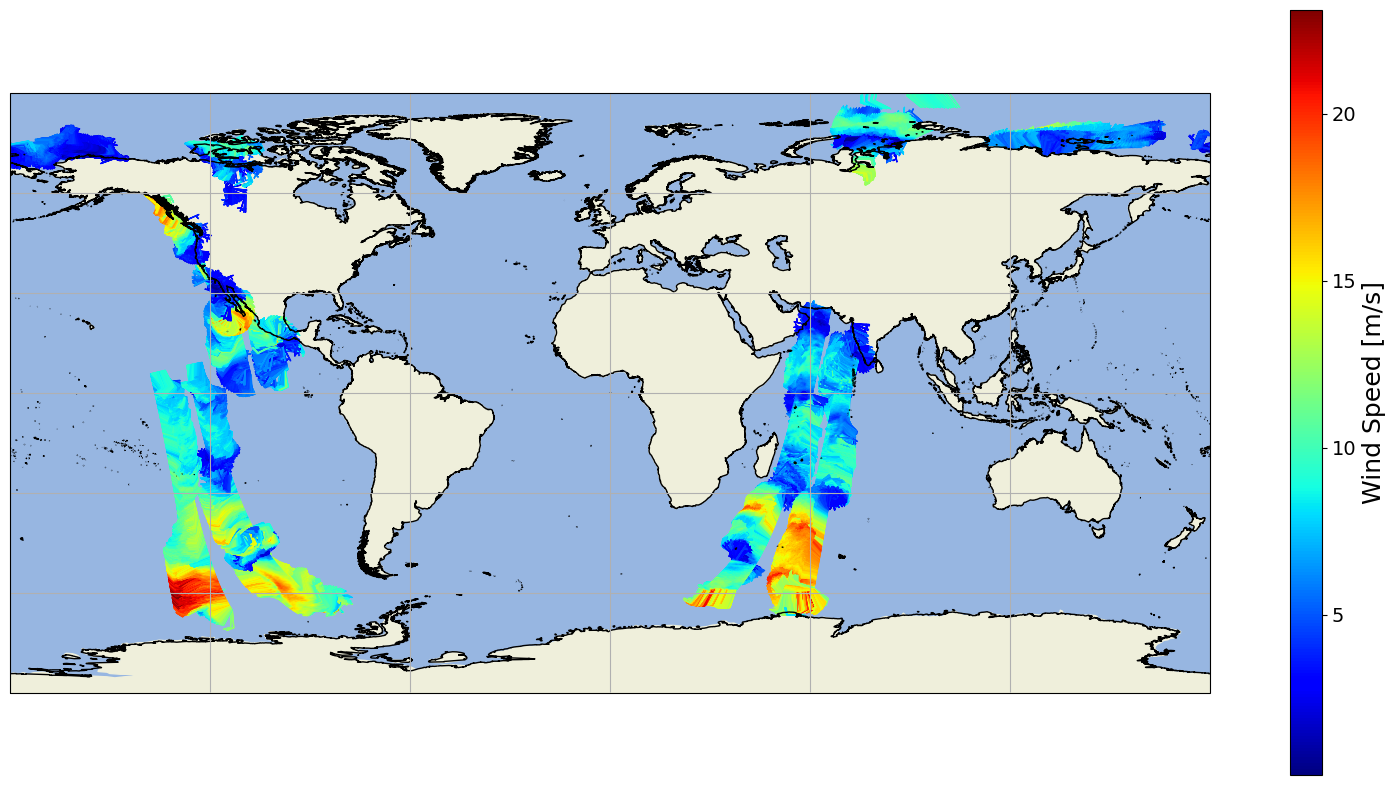

In [3]:
fig = plt.figure(figsize=(16,9))

projection=ccrs.PlateCarree()
data_projection=ccrs.PlateCarree()

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_global()
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1
        im = ax.barbs(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

In [4]:
# setting geographical area
lon_min = -80
lon_max = -60
lat_min = -50
lat_max = -60

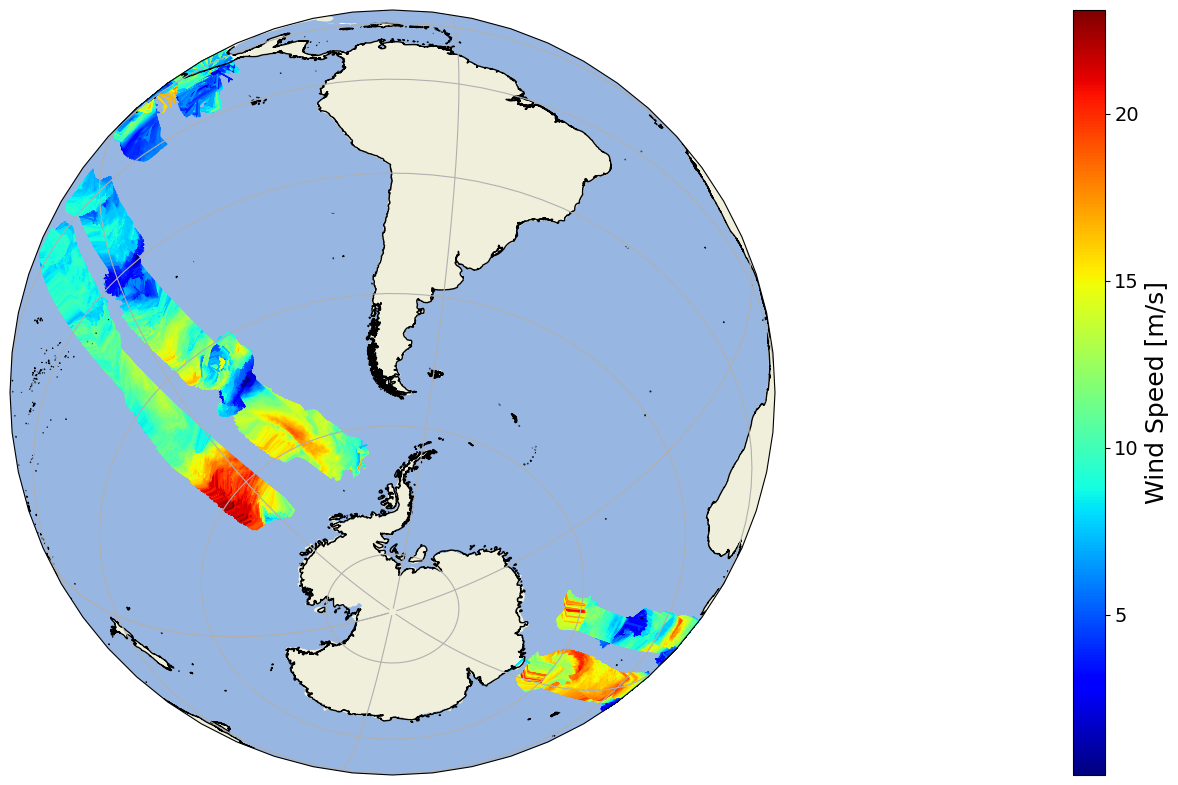

In [5]:
fig = plt.figure(figsize=(16,9))
projection=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)
data_projection=ccrs.PlateCarree()

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_global()
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1
        im = ax.barbs(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

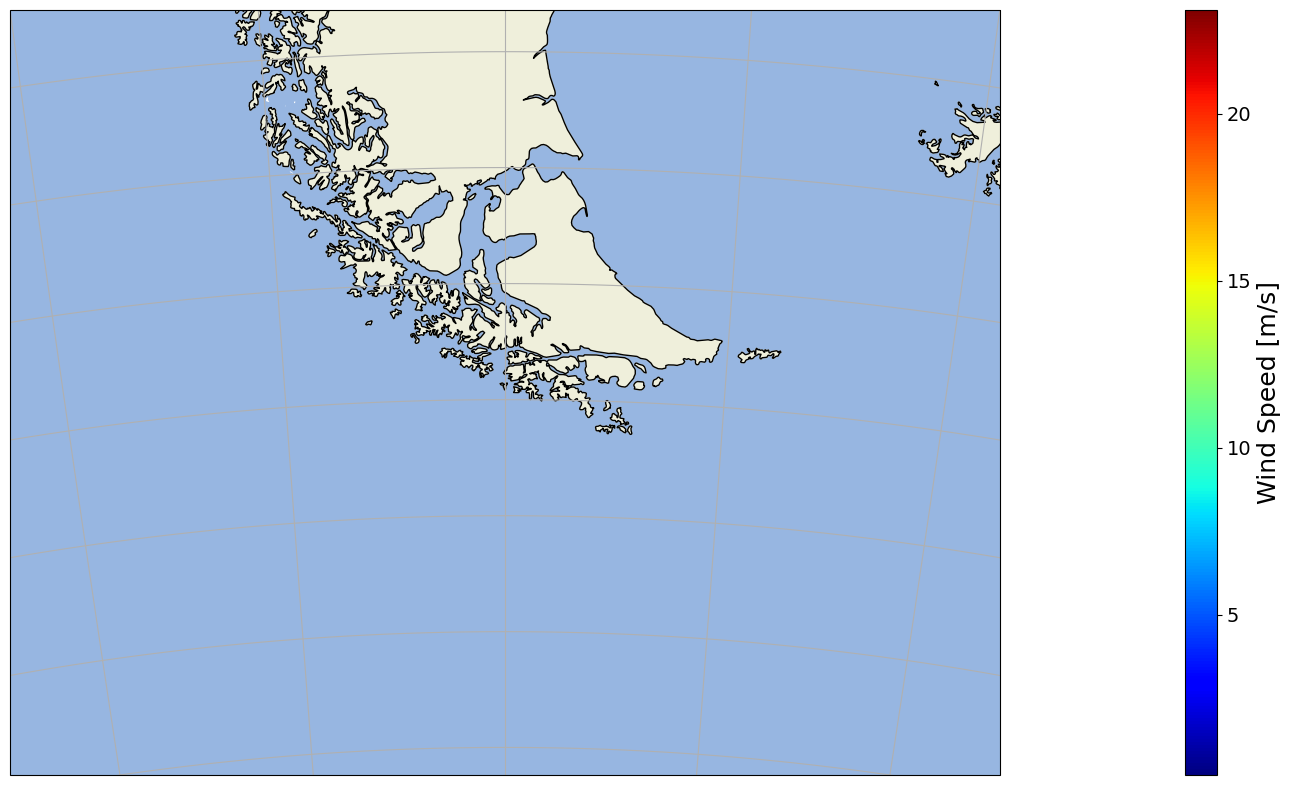

In [6]:
fig = plt.figure(figsize=(16,9))
projection=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)
data_projection=ccrs.PlateCarree()

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1
        im = ax.barbs(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>